In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.drop(columns=["PassengerId","Name"],axis=1,inplace=True)

In [5]:
df.shape

(8693, 12)

In [6]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [8]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df["CryoSleep"].fillna(df["CryoSleep"].mode()[0],inplace=True)
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)
df["Destination"].fillna(df["Destination"].mode()[0],inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["VIP"].fillna(df["VIP"].mode()[0],inplace=True)
df["RoomService"].fillna(df["RoomService"].mean(),inplace=True)

df["FoodCourt"].fillna(df["FoodCourt"].mean(),inplace=True)
df["ShoppingMall"].fillna(df["ShoppingMall"].mean(),inplace=True)
df["Spa"].fillna(df["Spa"].mean(),inplace=True)
df["VRDeck"].fillna(df["VRDeck"].mean(),inplace=True)

<ipython-input-10-c7bb29853cdf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
<ipython-input-10-c7bb29853cdf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [11]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
df[['Deck', 'RoomNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)

In [13]:
df.drop(columns=["Cabin"],axis=1,inplace=True)

In [14]:
print("#"*100)
d=df["Destination"].value_counts()
print(d)
print("#"*100)
h=df["HomePlanet"].value_counts()
print(h)
print("#"*100)
c=df["CryoSleep"].value_counts()
print(c)
print("#"*100)
t=df["Transported"].value_counts()
print(t)
print("#"*100)

####################################################################################################
Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
####################################################################################################
HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64
####################################################################################################
CryoSleep
False    5656
True     3037
Name: count, dtype: int64
####################################################################################################
Transported
True     4378
False    4315
Name: count, dtype: int64
####################################################################################################


In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
from sklearn.preprocessing import MinMaxScaler

col = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

scaler = MinMaxScaler()

df[col] = scaler.fit_transform(df[col])


In [17]:
df["Transported"] = df["Transported"].astype(int)



In [18]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,RoomNumber,Side
0,1,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0
1,0,0,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,1,5,0,1
2,1,0,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,0,0,0,1
3,1,0,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,0,0,0,1
4,0,0,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,1,5,1,1


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop("Transported", axis=1)
y = df["Transported"]
chi2_selector = SelectKBest(chi2, k="all")
chi2_selector.fit(X, y)

chi2_results=pd.DataFrame({"Feature":X.columns,"P-value":chi2_selector.pvalues_})
chi2_results

,Feature,P-value
0,HomePlanet,2.445686e-26
1,CryoSleep,2.132856e-262
2,Destination,1.789201e-11
3,Age,3.753080e-02
4,VIP,5.945987e-04
5,RoomService,1.060065e-16
6,FoodCourt,6.383582e-02
7,ShoppingMall,7.823746e-01
8,Spa,3.676967e-18
9,VRDeck,1.481495e-15


In [20]:
col=["HomePlanet","RoomNumber","VRDeck","RoomService","CryoSleep","Destination","Transported"]
df=df[col]
df.head()

,HomePlanet,RoomNumber,VRDeck,RoomService,CryoSleep,Destination,Transported
0,1,0,0.000000,0.000000,0,2,0
1,0,0,0.001823,0.007608,0,2,1
2,1,0,0.002030,0.003001,0,2,0
3,1,0,0.007997,0.000000,0,2,0
4,0,1,0.000083,0.021149,0,2,1


In [21]:
df["RoomNumber"]=df["RoomNumber"].astype(int)

# Split Data

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop("Transported", axis=1)  
y = df["Transported"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (6954, 6)
Testing features shape: (1739, 6)
Training target shape: (6954,)
Testing target shape: (1739,)


# xgb_classifier

In [23]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
xgb_predictions = xgb_classifier.predict(X_test)
print("XGBClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(f"Precision: {precision_score(y_test, xgb_predictions)}")
print(f"Recall: {recall_score(y_test, xgb_predictions)}")
print(f"F1 Score: {f1_score(y_test, xgb_predictions)}")

XGBClassifier Metrics:
Accuracy: 0.7400805060379528
Precision: 0.7494145199063232
Recall: 0.7289293849658315
F1 Score: 0.7390300230946882


In [25]:
print("Classification Report:")
label_name=["False","True"]
print(classification_report(y_test, xgb_predictions,target_names=label_name))

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.75      0.74       861
        True       0.75      0.73      0.74       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



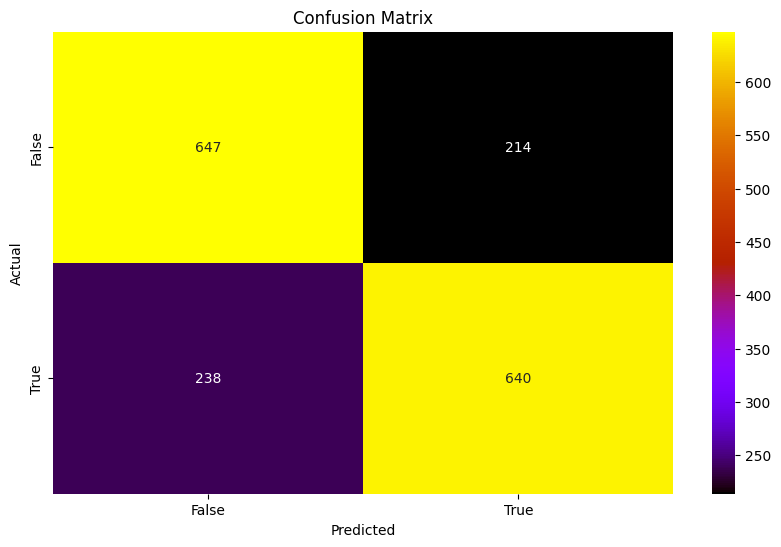

In [26]:
cm=confusion_matrix(y_test,xgb_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gnuplot", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# catboost classifier

In [27]:
catboost_classifier = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=100, verbose=1)
catboost_classifier.fit(X_train, y_train)
catboost_predictions = catboost_classifier.predict(X_test)

0:	learn: 0.6648176	total: 49.1ms	remaining: 4.86s
1:	learn: 0.6462268	total: 50.6ms	remaining: 2.48s
2:	learn: 0.6258905	total: 52.8ms	remaining: 1.71s
3:	learn: 0.6085687	total: 54.8ms	remaining: 1.31s
4:	learn: 0.5946738	total: 56.8ms	remaining: 1.08s
5:	learn: 0.5825229	total: 58.8ms	remaining: 921ms
6:	learn: 0.5712017	total: 60.8ms	remaining: 808ms
7:	learn: 0.5645645	total: 62.1ms	remaining: 714ms
8:	learn: 0.5558926	total: 63.8ms	remaining: 645ms
9:	learn: 0.5512855	total: 64.8ms	remaining: 583ms
10:	learn: 0.5449692	total: 66.4ms	remaining: 537ms
11:	learn: 0.5383809	total: 68.5ms	remaining: 502ms
12:	learn: 0.5334679	total: 70.5ms	remaining: 472ms
13:	learn: 0.5293202	total: 72.4ms	remaining: 445ms
14:	learn: 0.5249820	total: 74.5ms	remaining: 422ms
15:	learn: 0.5211155	total: 76.8ms	remaining: 403ms
16:	learn: 0.5194855	total: 78.3ms	remaining: 382ms
17:	learn: 0.5159075	total: 80.4ms	remaining: 366ms
18:	learn: 0.5129641	total: 82.3ms	remaining: 351ms
19:	learn: 0.5105249	t

In [28]:
print("CatBoostClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, catboost_predictions)}")
print(f"Precision: {precision_score(y_test, catboost_predictions)}")
print(f"Recall: {recall_score(y_test, catboost_predictions)}")
print(f"F1 Score: {f1_score(y_test, catboost_predictions)}")

CatBoostClassifier Metrics:
Accuracy: 0.7544565842438183
Precision: 0.7606936416184971
Recall: 0.7494305239179955
F1 Score: 0.7550200803212851


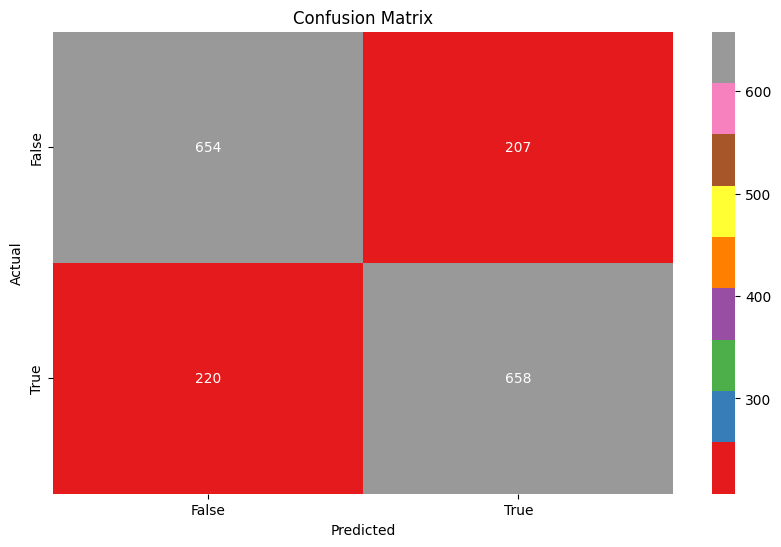

In [29]:
cm=confusion_matrix(y_test,catboost_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Set1", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
print("Classification Report:")
label_name=["False","True"]
print(classification_report(y_test, catboost_predictions,target_names=label_name))

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.76      0.75       861
        True       0.76      0.75      0.76       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



# Prediction on test_data

In [31]:
test_df=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [32]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [33]:
PassengerId=test_df.PassengerId

In [34]:
test_df[['Deck', 'RoomNumber', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

In [35]:
test_df=test_df[["HomePlanet","RoomNumber","VRDeck","RoomService","CryoSleep","Destination"]]

In [36]:
test_df.head()

,HomePlanet,RoomNumber,VRDeck,RoomService,CryoSleep,Destination
0,Earth,3,0.0,0.0,True,TRAPPIST-1e
1,Earth,4,0.0,0.0,False,TRAPPIST-1e
2,Europa,0,0.0,0.0,True,55 Cancri e
3,Europa,1,585.0,0.0,False,TRAPPIST-1e
4,Earth,5,0.0,10.0,False,TRAPPIST-1e


In [37]:
test_df.shape

(4277, 6)

In [38]:
test_df.isnull().sum()

HomePlanet      87
RoomNumber     100
VRDeck          80
RoomService     82
CryoSleep       93
Destination     92
dtype: int64

In [39]:
test_df["RoomNumber"] = pd.to_numeric(test_df["RoomNumber"], errors='coerce')
mean_value = test_df["RoomNumber"].mean()
test_df["RoomNumber"] = test_df["RoomNumber"].fillna(mean_value).astype(int)

In [40]:
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)

test_df['VRDeck'].fillna(test_df["VRDeck"].mean(), inplace=True)
test_df["CryoSleep"].fillna(test_df["CryoSleep"].mode()[0],inplace=True)

test_df["Destination"].fillna(test_df["Destination"].mode()[0],inplace=True)
test_df["RoomService"].fillna(test_df["RoomService"].mean(),inplace=True)

<ipython-input-40-918c0fe559d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
<ipython-input-40-918c0fe559d7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [41]:
test_df.head()

,HomePlanet,RoomNumber,VRDeck,RoomService,CryoSleep,Destination
0,Earth,3,0.0,0.0,True,TRAPPIST-1e
1,Earth,4,0.0,0.0,False,TRAPPIST-1e
2,Europa,0,0.0,0.0,True,55 Cancri e
3,Europa,1,585.0,0.0,False,TRAPPIST-1e
4,Earth,5,0.0,10.0,False,TRAPPIST-1e


In [42]:
categorical_cols=["HomePlanet","CryoSleep","Destination"]
for col in categorical_cols:
    test_df[col] = le.fit_transform(test_df[col])

In [43]:
test_df.head()

,HomePlanet,RoomNumber,VRDeck,RoomService,CryoSleep,Destination
0,0,3,0.0,0.0,1,2
1,0,4,0.0,0.0,0,2
2,1,0,0.0,0.0,1,0
3,1,1,585.0,0.0,0,2
4,0,5,0.0,10.0,0,2


In [44]:
my_prediction=catboost_classifier.predict(test_df)
my_pred=my_prediction.astype(bool)
my_submission=pd.DataFrame({'PassengerId':PassengerId,'Transported':my_pred})
my_submission.to_csv('submission.csv',index=False)

In [45]:
my_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
